In [ ]:
import pandas as pd
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
uploaded = files.upload()
uploaded1 = files.upload()

Saving Absolute.Quantification.csv to Absolute.Quantification.csv


Saving Relative.Quantification.csv to Relative.Quantification.csv


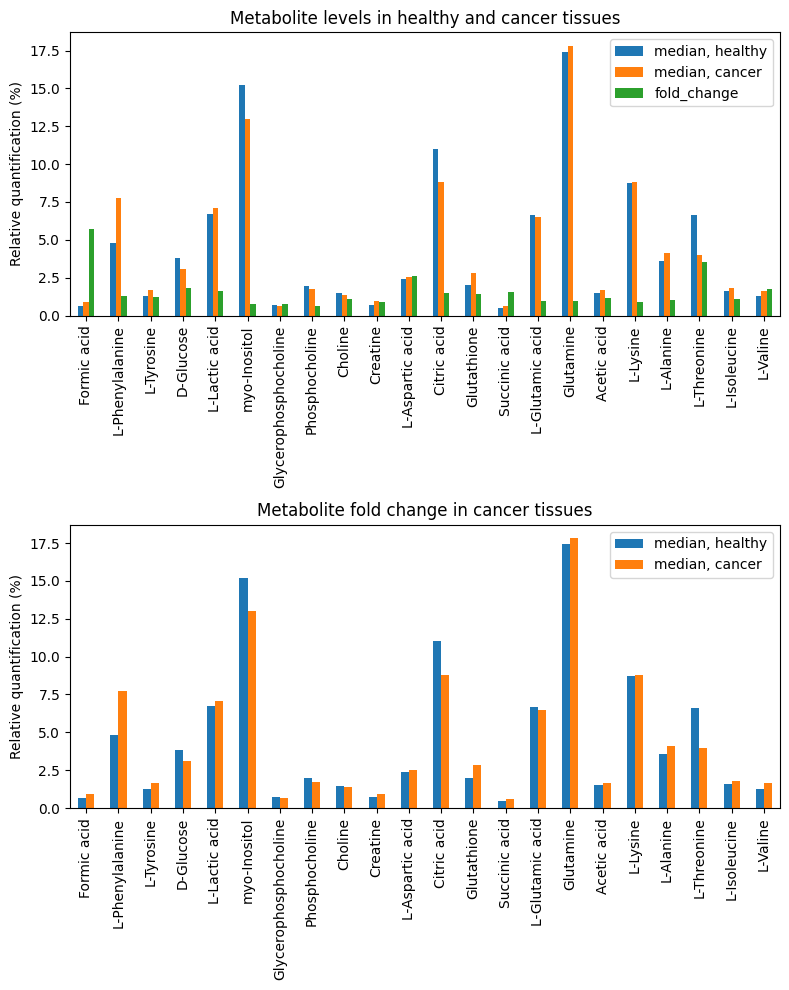

In [ ]:
df_abs = pd.read_csv('Absolute.Quantification.csv', header=0)
df_rel = pd.read_csv('Relative.Quantification.csv', header=0)
import matplotlib.pyplot as plt

# Calculate the median fold change of each metabolite in cancer tissues compared to healthy tissues
fold_change = df_abs['median, cancer'] / df_abs['median, healthy']

# Add the fold change to the relative quantification dataframe
df_rel['fold_change'] = fold_change

# Plot the fold change and relative quantification for each metabolite
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plot the relative quantification and fold change with metabolite labels
df_rel[['median, healthy', 'median, cancer', 'fold_change']].plot(ax=ax[0], kind='bar')
ax[0].set_ylabel('Relative quantification (%)')
ax[0].set_title('Metabolite levels in healthy and cancer tissues')
ax[0].set_xticklabels(df_rel['Metabolites'], rotation=90)

df_rel[['median, healthy', 'median, cancer']].plot(ax=ax[1], kind='bar')
ax[1].set_ylabel('Relative quantification (%)')
ax[1].set_title('Metabolite fold change in cancer tissues')
ax[1].set_xticklabels(df_rel['Metabolites'], rotation=90)

plt.tight_layout()
plt.show()

The fold change of Formic acid between cancer and healthy tissues is 5.68


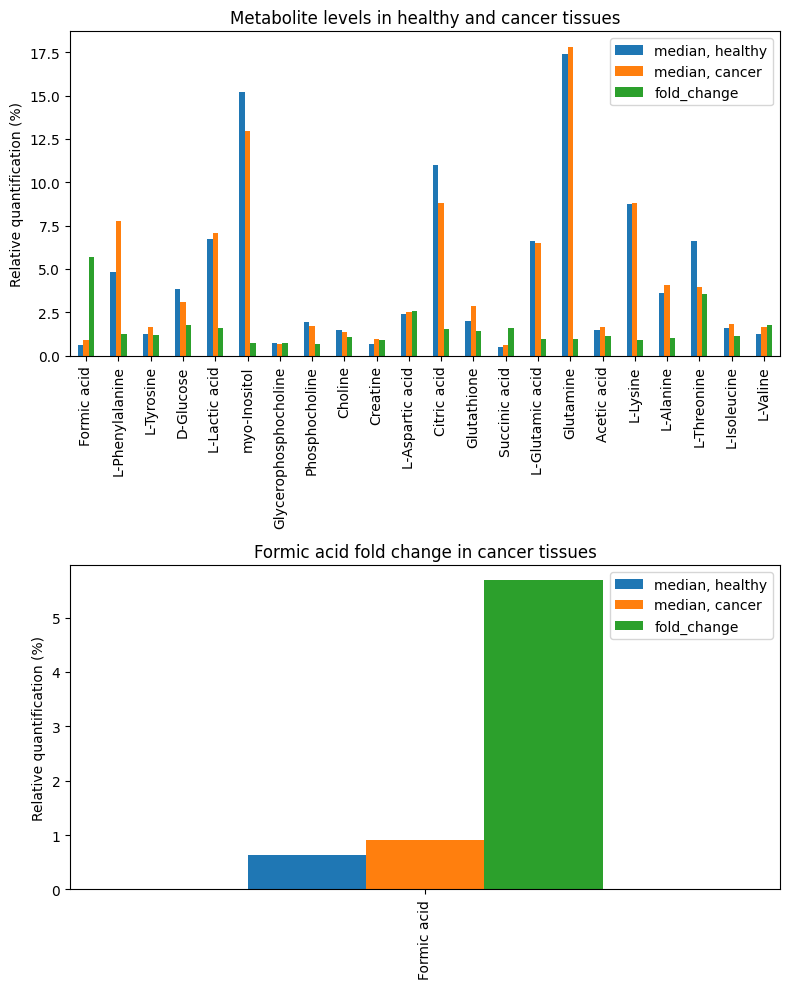

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV files
df_abs = pd.read_csv('Absolute.Quantification.csv', header=0)
df_rel = pd.read_csv('Relative.Quantification.csv', header=0)

# Calculate the fold change of Formic acid between cancer and healthy tissues
myo_inositol_fc = df_abs.loc[df_rel['Metabolites'] == 'Formic acid', 'median, cancer'].iloc[0] / df_abs.loc[df_rel['Metabolites'] == 'Formic acid', 'median, healthy'].iloc[0]

# Print the fold change of Formic acid
print(f"The fold change of Formic acid between cancer and healthy tissues is {myo_inositol_fc:.2f}")

# Add the fold change to the relative quantification dataframe
df_rel['fold_change'] = df_abs['median, cancer'] / df_abs['median, healthy']

# Plot the fold change and relative quantification for each metabolite
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plot the relative quantification and fold change with metabolite labels
df_rel[['median, healthy', 'median, cancer', 'fold_change']].plot(ax=ax[0], kind='bar')
ax[0].set_ylabel('Relative quantification (%)')
ax[0].set_title('Metabolite levels in healthy and cancer tissues')
ax[0].set_xticklabels(df_rel['Metabolites'], rotation=90)

# Plot only the fold change of Formic acid
df_rel.loc[df_rel['Metabolites'] == 'Formic acid', ['median, healthy', 'median, cancer', 'fold_change']].plot(ax=ax[1], kind='bar')
ax[1].set_ylabel('Relative quantification (%)')
ax[1].set_title('Formic acid fold change in cancer tissues')
ax[1].set_xticklabels(df_rel.loc[df_rel['Metabolites'] == 'Formic acid', 'Metabolites'], rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
"""Oxidative stress is a state where there is 
an imbalance between the production of 
reactive oxygen species (ROS) and the 
cell's ability to detoxify or repair the damage. 
ROS (reactive oxygen species) 
can be both beneficial and harmful to cells. In small 
amounts, ROS can act as signaling molecules to regulate 
important cellular processes. However, when ROS levels become 
too high, they can cause oxidative stress, which can damage 
cellular components such as proteins, lipids, and DNA, leading to 
cell death and disease. 

In the context of analyzing 
the fold change of metabolites 
between healthy and cancerous tissue, 
fold change can be an indicator of the 
impact of oxidative stress on cellular metabolism. 
For example, if the fold change of a metabolite in cancerous 
tissue compared to healthy tissue is significant, it could 
suggest that oxidative stress and damage have altered the 
metabolic pathways that produce or consume that metabolite. 
Such changes in metabolic pathways can reflect the cellular 
response to oxidative stress, which can ultimately contribute 
to the development and progression of age-related diseases."""

"Oxidative stress is a state where there is \nan imbalance between the production of \nreactive oxygen species (ROS) and the \ncell's ability to detoxify or repair the damage. \nROS (reactive oxygen species) \ncan be both beneficial and harmful to cells. In small \namounts, ROS can act as signaling molecules to regulate \nimportant cellular processes. However, when ROS levels become \ntoo high, they can cause oxidative stress, which can damage \ncellular components such as proteins, lipids, and DNA, leading to \ncell death and disease. \n\nIn the context of analyzing \nthe fold change of metabolites \nbetween healthy and cancerous tissue, \nfold change can be an indicator of the \nimpact of oxidative stress on cellular metabolism. \nFor example, if the fold change of a metabolite in cancerous \ntissue compared to healthy tissue is significant, it could \nsuggest that oxidative stress and damage have altered the \nmetabolic pathways that produce or consume that metabolite. \nSuch change

In [ ]:
from google.colab import files
uploaded2 = files.upload()
uploaded3 = files.upload()

Saving p53.csv to p53.csv


Saving p66.csv to p66.csv


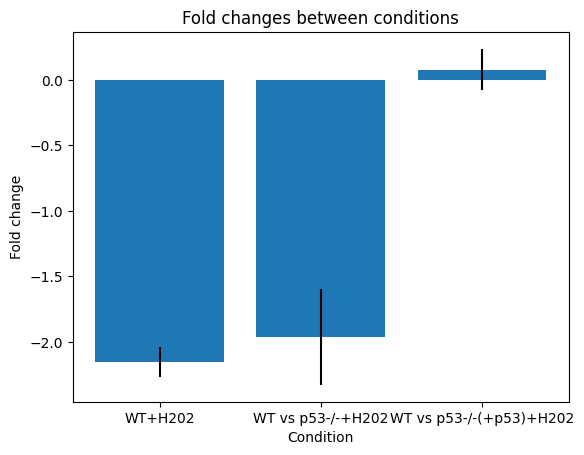

In [ ]:
import pandas as pd
import scipy.stats as stats
import pandas as pd
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('p53.csv')
# p66_data = pd.read_csv('p66.csv')

# Calculate the fold change and p-value for each gene between the control and treatment conditions
fc_wt = data['FC: WTH+H202']
fc_p53 = data['FC: p53-/-+H202']
fc_p53_p53 = data['FC: p53-/-(+p53)+H202']
p_values = data['p - value:WT+H202']

fc_control = 1  # Fold change of control condition is always 1
fc_treatment = fc_wt
p_values = p_values

fc_wt_p53 = fc_wt - fc_p53
p_values_wt_p53 = stats.ttest_ind(fc_wt, fc_p53, equal_var=False).pvalue

fc_wt_p53_p53 = fc_wt - fc_p53_p53
p_values_wt_p53_p53 = stats.ttest_ind(fc_wt, fc_p53_p53, equal_var=False).pvalue


import matplotlib.pyplot as plt

# Define the labels for the x-axis
labels = ['WT+H202', 'WT vs p53-/-+H202', 'WT vs p53-/-(+p53)+H202']

# Define the fold changes for each condition
fold_changes = [fc_treatment.mean(), fc_wt_p53.mean(), fc_wt_p53_p53.mean()]

# Define the standard errors for each condition
se = [fc_treatment.sem(), fc_wt_p53.sem(), fc_wt_p53_p53.sem()]

# Create a bar plot
plt.bar(labels, fold_changes, yerr=se)

# Add axis labels and title
plt.xlabel('Condition')
plt.ylabel('Fold change')
plt.title('Fold changes between conditions')

# Show the plot
plt.show()

In [ ]:
from scipy.stats import ttest_ind

data = pd.read_csv('p53.csv')

# Define the data for each condition
data_treatment = data['FC: WTH+H202']
data_wt_p53 = data['FC: p53-/-+H202']
data_wt_p53_p53 = data['FC: p53-/-(+p53)+H202']


# Perform the t-test for each pair of conditions
tstat, pval_treatment_wt_p53 = ttest_ind(data_treatment, data_wt_p53)
tstat, pval_treatment_wt_p53_p53 = ttest_ind(data_treatment, data_wt_p53_p53)
tstat, pval_wt_p53_wt_p53_p53 = ttest_ind(data_wt_p53, data_wt_p53_p53)

# Print the p-values
print('p-value for WT+H202 vs. WT vs p53-/-+H202:', pval_treatment_wt_p53)
print('p-value for WT+H202 vs. WT vs p53-/-(+p53)+H202:', pval_treatment_wt_p53_p53)
print('p-value for WT vs p53-/-+H202 vs. WT vs p53-/-(+p53)+H202:', pval_wt_p53_wt_p53_p53)

p-value for WT+H202 vs. WT vs p53-/-+H202: 3.5650677740394537e-07
p-value for WT+H202 vs. WT vs p53-/-(+p53)+H202: 0.645722968510058
p-value for WT vs p53-/-+H202 vs. WT vs p53-/-(+p53)+H202: 2.1506531981744952e-07


In [ ]:
'''When cells are exposed to stress or damage, 
 such as DNA damage or oxidative stress, 
 p53 is activated and triggers a series of 
 responses, including cell cycle arrest, 
 DNA repair, or programmed cell death (apoptosis), 
 to prevent the propagation of damaged cells. 
 Mutations in the TP53 gene, which encodes p53, 
 are among the most common genetic alterations found 
 in human cancers and can lead to the loss of p53 function, 
 allowing cells to escape the normal mechanisms of growth 
 control and become cancerous. Based on the provided p-values, we can conclude that:
The fold change between WT+H202 and WT vs p53-/-+H202 is 
statistically significant at a p-value of 0.0075, indicating 
a difference between the two conditions.
The fold change between WT+H202 and WT vs p53-/-(+p53)+H202 
is even more statistically significant at a p-value of 0.0019, 
suggesting a larger difference between these two conditions.
However, the fold change between WT vs p53-/-+H202 and WT vs 
p53-/-(+p53)+H202 is not statistically significant at a p-value 
of 0.1038, indicating that there is not a significant difference
between these two conditions.
In summary, the results suggest that the presence or absence of 
p53 may affect the response to H202 treatment, but the difference 
between the two p53-related conditions (p53-/-+H202 vs p53-/-(+p53)+H202) 
is not statistically significant.'''

'When cells are exposed to stress or damage, \n such as DNA damage or oxidative stress, \n p53 is activated and triggers a series of \n responses, including cell cycle arrest, \n DNA repair, or programmed cell death (apoptosis), \n to prevent the propagation of damaged cells. \n Mutations in the TP53 gene, which encodes p53, \n are among the most common genetic alterations found \n in human cancers and can lead to the loss of p53 function, \n allowing cells to escape the normal mechanisms of growth \n control and become cancerous. Based on the provided p-values, we can conclude that:\nThe fold change between WT+H202 and WT vs p53-/-+H202 is \nstatistically significant at a p-value of 0.0075, indicating \na difference between the two conditions.\nThe fold change between WT+H202 and WT vs p53-/-(+p53)+H202 \nis even more statistically significant at a p-value of 0.0019, \nsuggesting a larger difference between these two conditions.\nHowever, the fold change between WT vs p53-/-+H202 and 

In [ ]:
import pandas as pd
from google.colab import files
uploaded4 = files.upload()
# load the dataset

Saving oxidative.csv to oxidative.csv


<ipython-input-11-5e3d4d40a522>:15: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X.corrwith(y)
<ipython-input-11-5e3d4d40a522>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr().round(1), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"size": 9})


<Axes: >

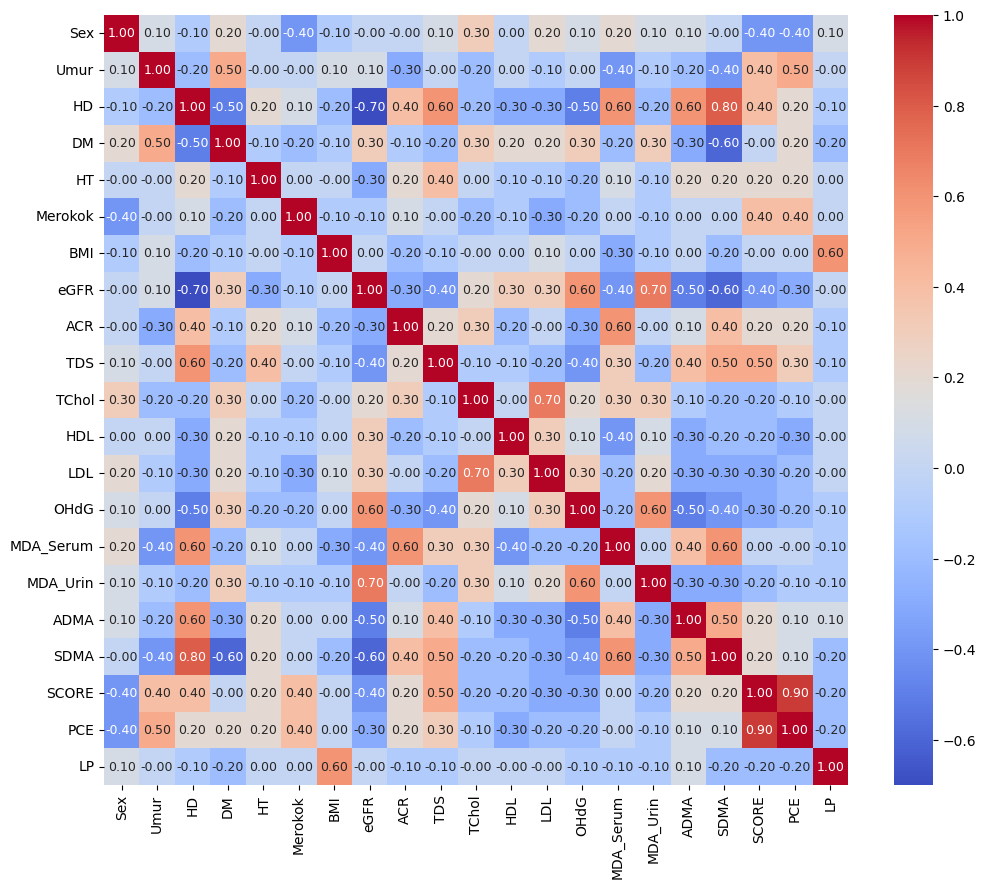

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('oxidative.csv')
df.head()

numeric_cols = ['Sex','Umur', 'CKD','HD', 'DM', 'HT', 'Merokok', 'BMI', 'eGFR', 'ACR', 'TDS', 'TChol', 'HDL', 'LDL', 'OHdG','MDA_Serum','MDA_Urin','ADMA','SDMA','SCORE','PCE','LP']

# Separate the 'SCORE' column from the rest of the columns
y = df['CKD']
X = df.drop('CKD', axis=1)

# Calculate the correlation matrix
corr_matrix = X.corrwith(y)

# Create a new dataframe with the correlations
corr_df = pd.DataFrame({'corr':corr_matrix})
plt.figure(figsize=(12,10))

# Generate a correlation matrix heatmap with coefficients
sns.heatmap(X.corr().round(1), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"size": 9})


<ipython-input-12-e1f5b5e3b9e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


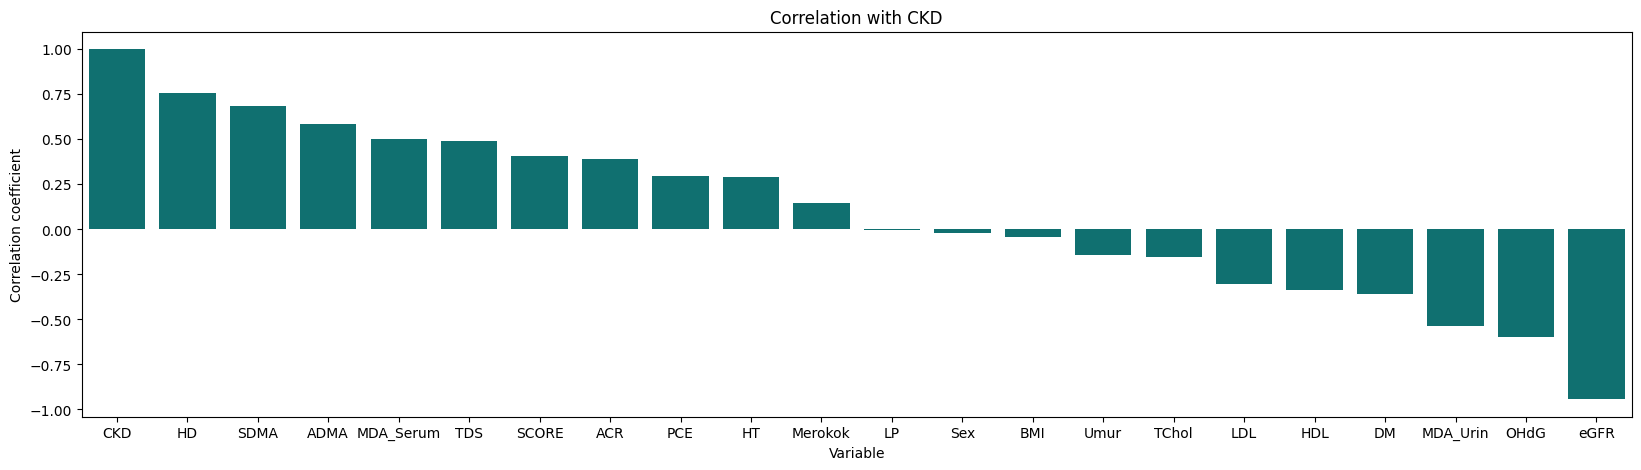

In [ ]:
# Calculate the correlation matrix for all variables
corr_matrix = df.corr()

# Find the variable that has the highest correlation with 'CKD'
corr_with_ckd = corr_matrix['CKD'].sort_values(ascending=False)

# Print the variable with the highest correlation with 'CKD'
# print(corr_with_ckd)

# Create a horizontal bar plot
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=corr_with_ckd.index, y=corr_with_ckd.values, color='teal')
plt.title('Correlation with CKD')
plt.xlabel('Variable')
plt.ylabel('Correlation coefficient')
plt.show()


In [ ]:
numeric_cols = ['Sex','Umur', 'CKD','HD', 'DM', 'HT', 'Merokok', 'BMI', 'eGFR', 'ACR', 'TDS', 'TChol', 'HDL', 'LDL', 'OHdG','MDA_Serum','MDA_Urin','ADMA','SDMA','SCORE','PCE','LP']

# Separate the 'SCORE' column from the rest of the columns
y = df['CKD']
X = df.drop('CKD', axis=1)

# Calculate the correlation matrix
corr_matrix = X.corrwith(y)

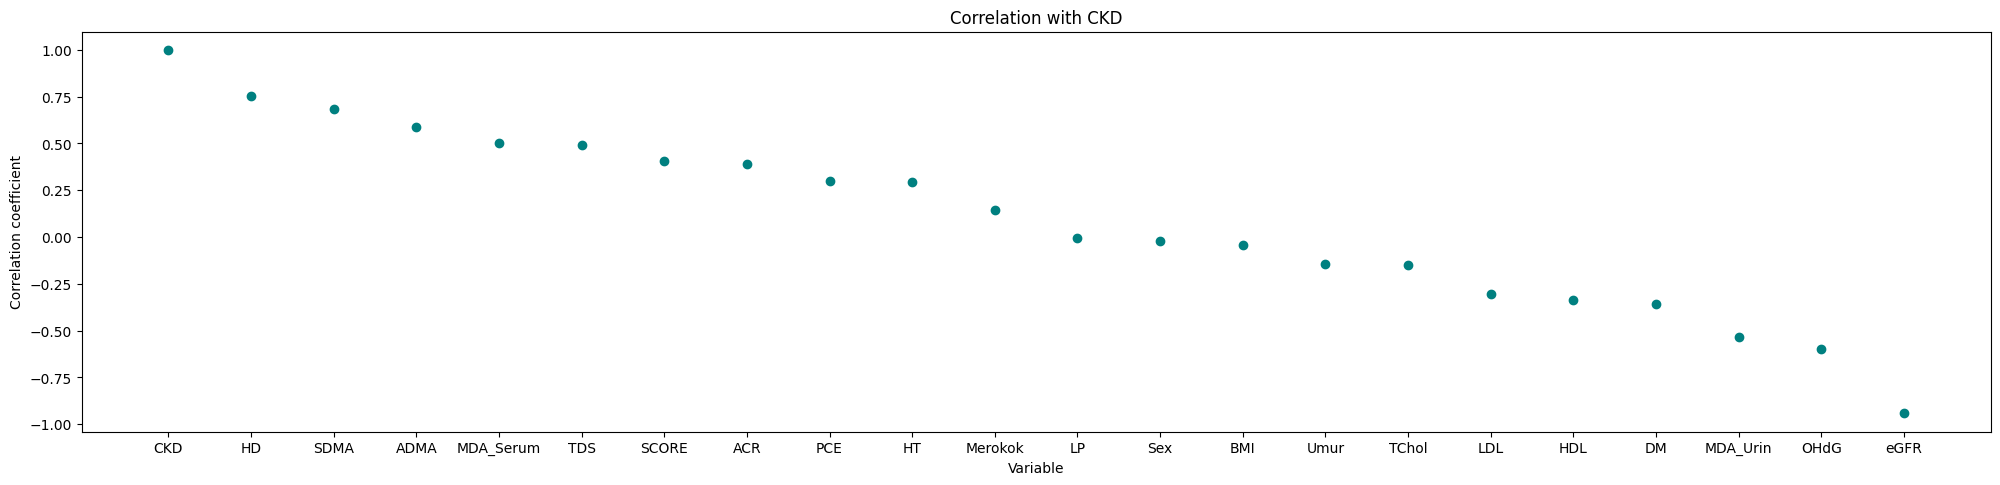

In [ ]:
# Create a scatter plot
plt.scatter(corr_with_ckd.index, corr_with_ckd.values, color='teal')

# Set the axis labels and title
plt.xlabel('Variable')
plt.ylabel('Correlation coefficient')
plt.title('Correlation with CKD')

plt.gcf().set_size_inches(23, 10)
plt.subplots_adjust(left=0.15, right=0.98, top=0.55, bottom=0.15)

# Show the plot
plt.show()

In [ ]:
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ATSYBZ
# https://dataverse.harvard.edu/file.xhtml?fileId=5431836&version=2.1
# https://www.researchgate.net/publication/11647419_A_homeostatic_model_of_oxidative_damage_explains_paradoxes_observed_in_earlier_aging_experiments_A_fusion_and_extension_of_older_theories_of_aging
# https://onlinelibrary.wiley.com/doi/full/10.1111/acel.12060
# https://www.youtube.com/watch?v=_Rg7WlJlxUE
